<b> Dataset Overview:<b> 
    
#### Dataset Is On the Kidney Stone Prediction based on Urine Analysis dataset. <br>
    
    
     pl_train.csv - the training dataset; target is the likelihood of a kidney stone being present.
     pl_test.csv - the test dataset; your objective is to predict the probability of target.

In [6]:
import pandas as pd

In [78]:
in_df = pd.read_csv('submission of kidney sample .csv')
in_df

,ID,Prediction
0,414,0
1,415,0
2,416,1
3,417,0
4,418,0
...,...,...
271,685,1
272,686,0
273,687,1
274,688,0


In [7]:
train_df = pd.read_csv('pl_train.csv')
train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [8]:
test_df = pd.read_csv('pl_test.csv')
test_df.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


### Checking The Shape 

In [9]:
print(train_df.shape)   # rows - 414, cols - 8  - (Target variable is present)
print(test_df.shape)    # rows - 276, cols - 7  - (Target variable is absent)

(414, 8)
(276, 7)


In [10]:
print(train_df.columns)

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')


### Data Preprocessing

#### 1) Handle the null values

In [11]:
train_nv = train_df.isnull().sum()
train_nv[train_nv>0]

Series([], dtype: int64)

In [12]:
test_nv = test_df.isnull().sum()
test_nv[test_nv>0]

Series([], dtype: int64)

#### Inference
1) There are no null values in the train and the test data.

#### 2) Handle the Duplicates

In [13]:
train_df.duplicated().sum()

0

In [14]:
test_df.duplicated().sum()

0

#### Inference
1) There are no duplicate values in the train and the test data.

#### 3) Checking the data type inconsistencies

In [15]:
train_df.dtypes.value_counts()

int64      4
float64    4
dtype: int64

In [16]:
test_df.dtypes.value_counts()

float64    4
int64      3
dtype: int64

#### 4) Target Variable

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
t = train_df['target'].value_counts()
t

0    230
1    184
Name: target, dtype: int64

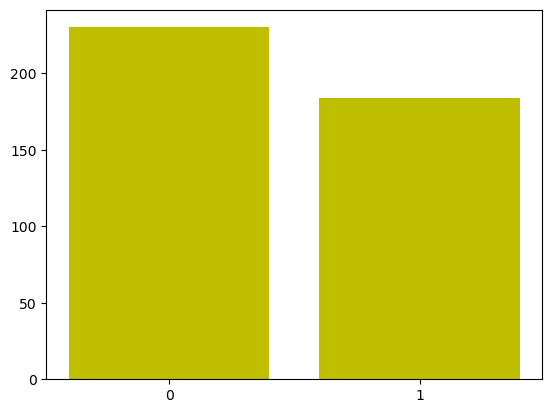

In [19]:
plt.bar(t.index,t,color='y')
plt.xticks(t.index)
plt.show()

#### Inference :-
<b> kidney stone being present = 1 -> Is Lesser in number <br>
kidney stone being not present = 0 ->  Is Higher in number <b>

#### Correlation

In [20]:
corr = train_df.corr()

#### Representing Features having correlation more than 0.7

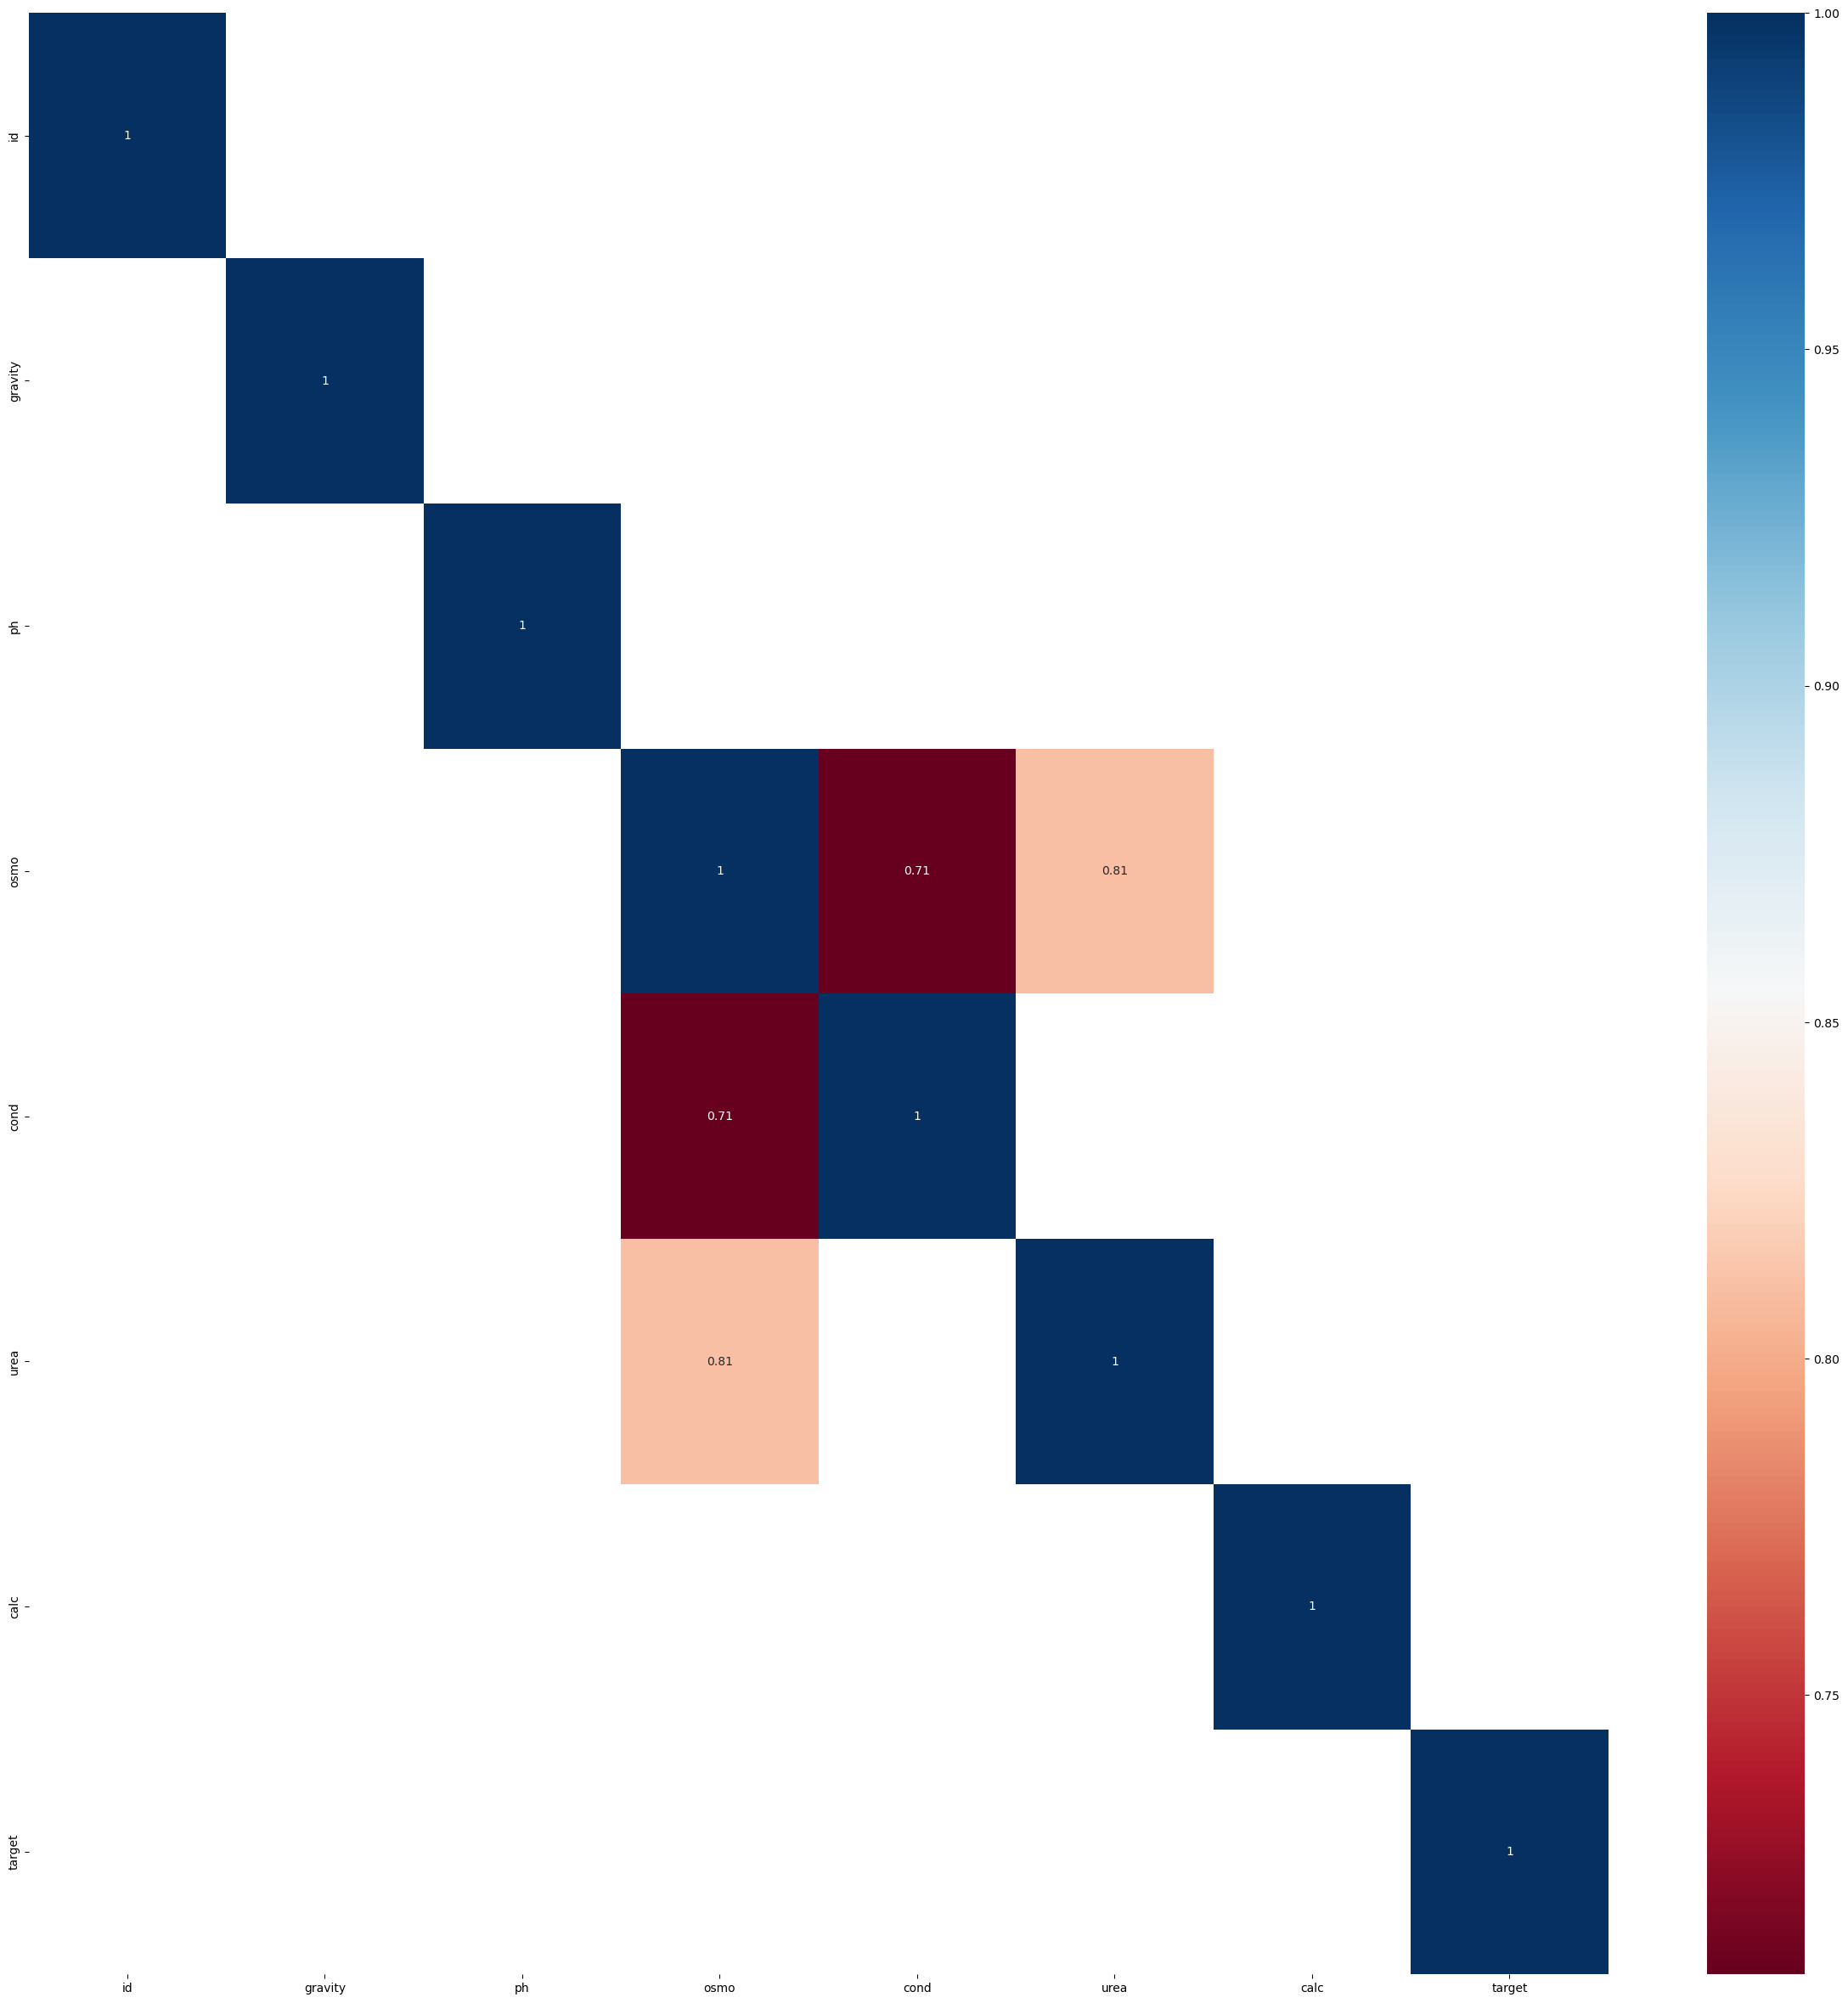

In [21]:
plt.figure(figsize=(30,30))
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='RdBu')
plt.show()

### Selecting Dependent and Independent Features

In [22]:
x = train_df.drop(['id','target'],axis=1)
y = train_df['target']
print(type(x))  # DataFrame
print(type(y))  # Series
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(414, 6)
(414,)


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(310, 6)
(104, 6)
(310,)
(104,)


#### Create Function to evaluate confusion_matrix, classification_report and to generate train and test score

In [25]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [26]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(ytest,ypred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(ytest,ypred))
    print('Test Acc',accuracy_score(ytest,ypred))
    
    
def mscore(model):
    print('Train Score', model.score(x_train,y_train))
    print('Test Score', model.score(x_test,y_test))

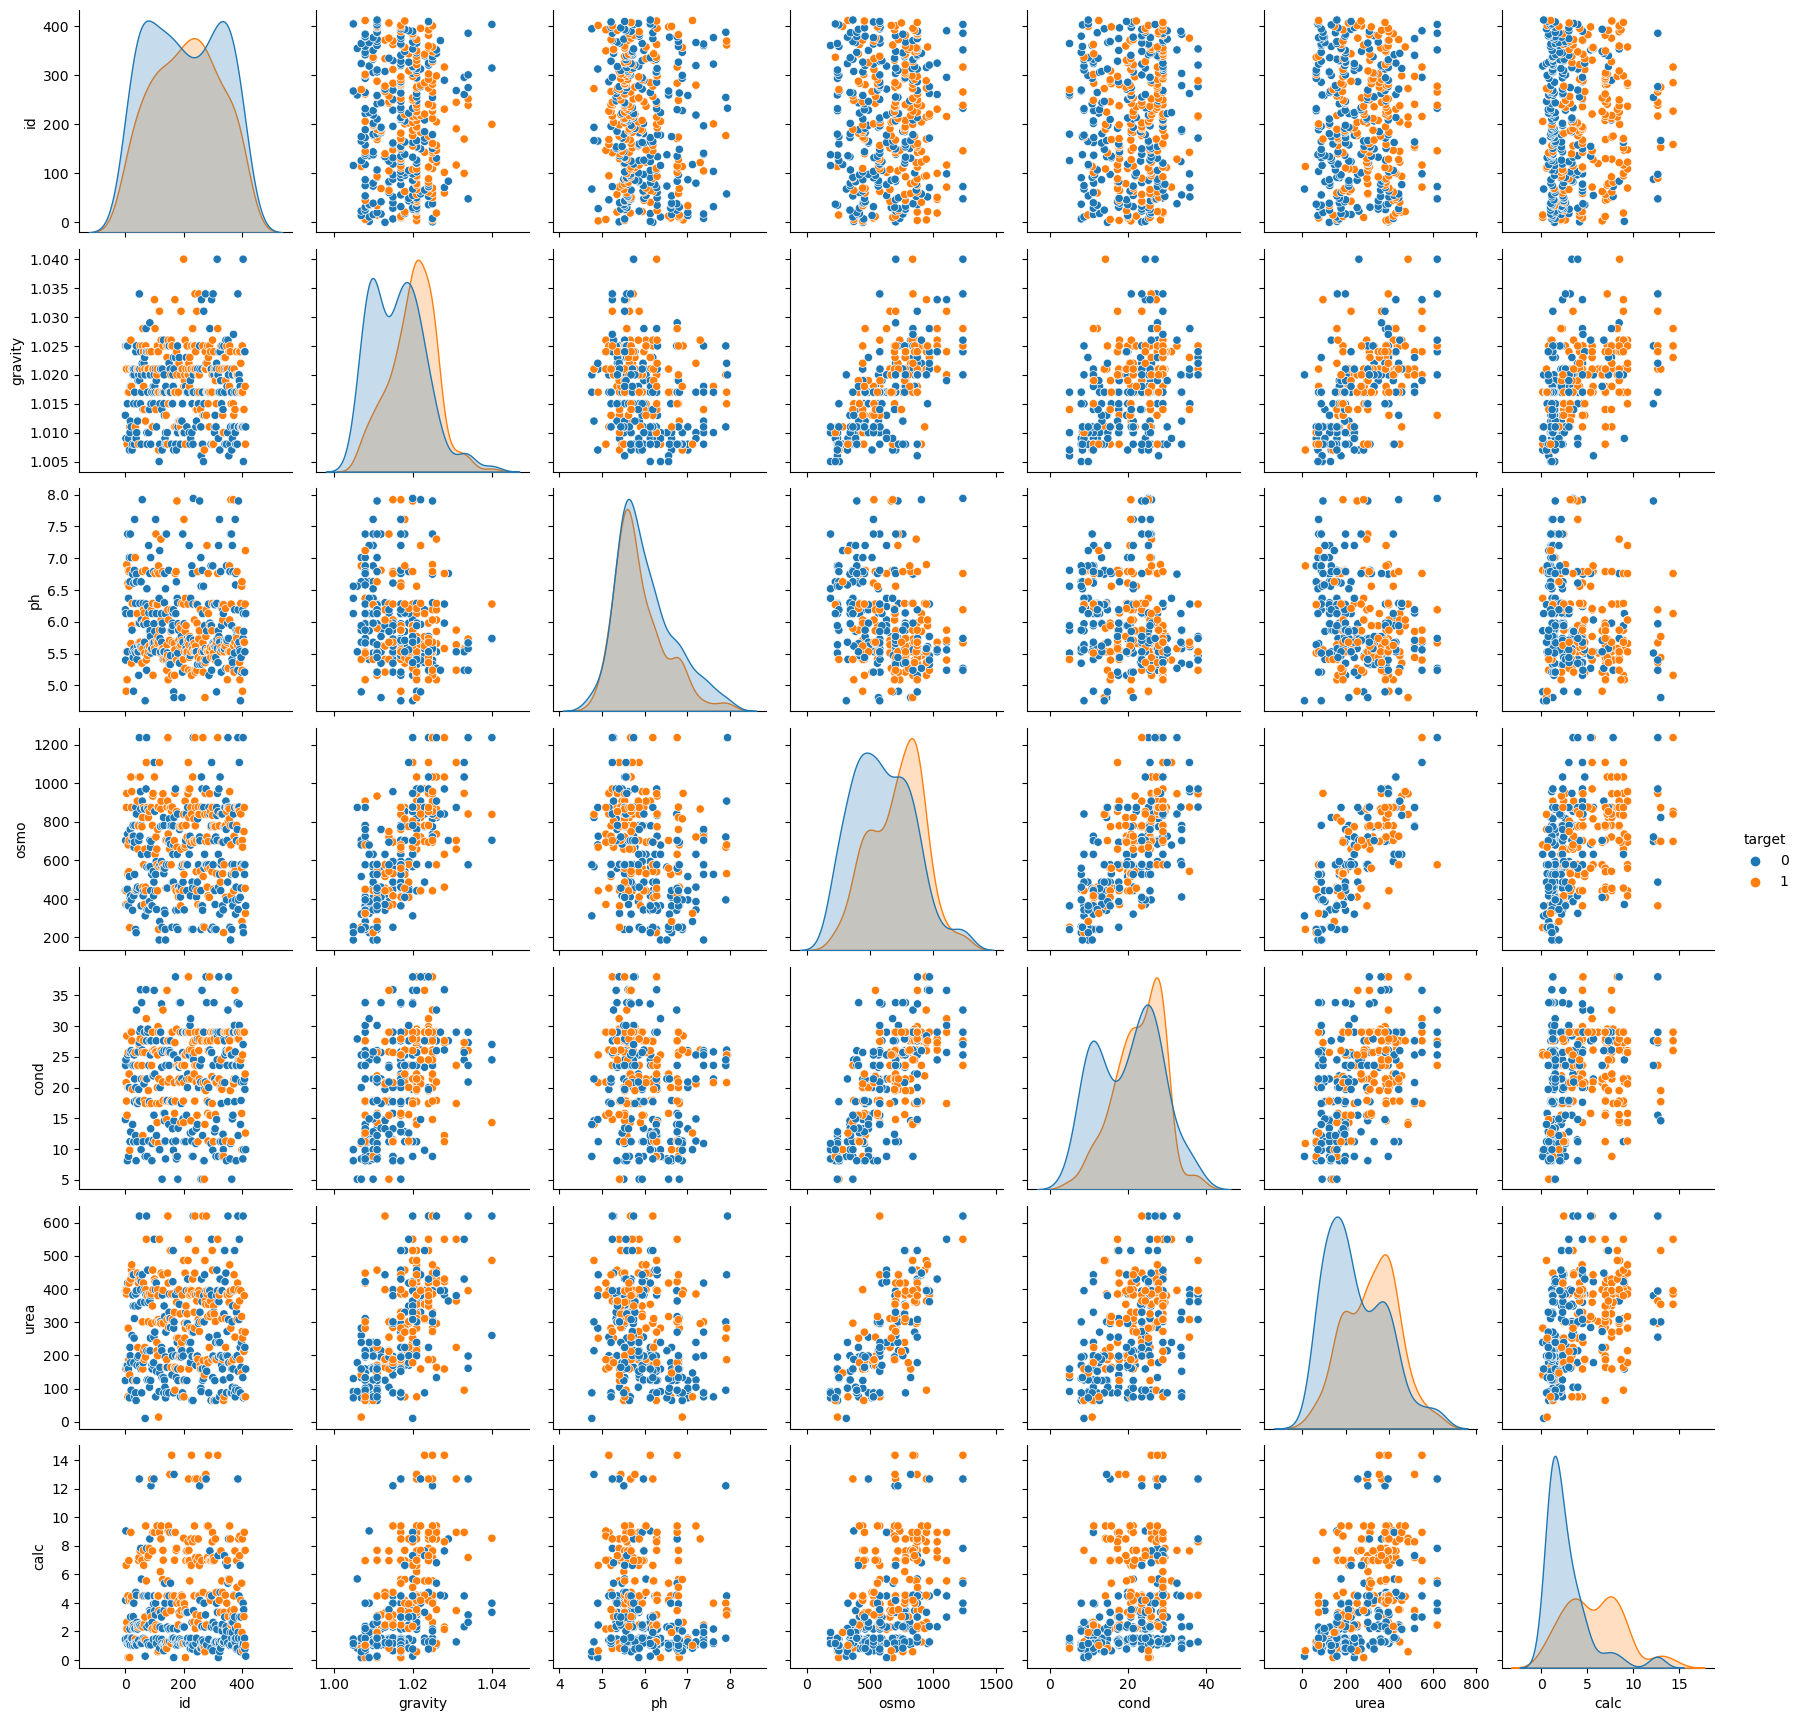

In [27]:
sns.pairplot(train_df, hue='target')
plt.show()

### Inference : <br>
   <b>The Pairplot Showing The Datapoints Are Overlapping eachother:- That means it is a non-linear classification. Therefore, we don't need to apply Logistic Regression (cause it is a Linear Classification thet finds Best-Fit Line)<b>. We Have To Apply  non-linear classification ML Model like KNN,Decision Tree,Random Forest, etc.<b>

#### Importing libraries for ML models

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#### 1) KNN Classifier

In [29]:
knn1 = KNeighborsClassifier(n_neighbors=19)
knn1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [30]:
mscore(knn1)

Train Score 0.6225806451612903
Test Score 0.6057692307692307


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [31]:
ypred_knn1 = knn1.predict(x_test) # Predicted Output
ypred_knn1

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [32]:
y_test.values # Actual Output

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [33]:
eval_model(y_test,ypred_knn1)

Confusion Matrix
 [[31 19]
 [22 32]]
Classification Report
               precision    recall  f1-score   support

           0       0.58      0.62      0.60        50
           1       0.63      0.59      0.61        54

    accuracy                           0.61       104
   macro avg       0.61      0.61      0.61       104
weighted avg       0.61      0.61      0.61       104

Test Acc 0.6057692307692307


#### 2) Decision Tree Classifier

In [34]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=20,min_samples_split=80)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, min_samples_split=80)

In [35]:
mscore(dt1)

Train Score 0.7774193548387097
Test Score 0.7019230769230769


In [36]:
ypred_dt1 = dt1.predict(x_test) # Predicted Output
ypred_dt1

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [37]:
y_test.values # Actual Reesult

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [38]:
eval_model(y_test,ypred_dt1) 

Confusion Matrix
 [[39 11]
 [20 34]]
Classification Report
               precision    recall  f1-score   support

           0       0.66      0.78      0.72        50
           1       0.76      0.63      0.69        54

    accuracy                           0.70       104
   macro avg       0.71      0.70      0.70       104
weighted avg       0.71      0.70      0.70       104

Test Acc 0.7019230769230769


#### 3) RandomForest Classifier

In [39]:
rf1 = RandomForestClassifier(n_estimators=100,criterion='gini',
                             max_depth=25,min_samples_split=30)
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_split=30)

In [40]:
mscore(rf1)

Train Score 0.8225806451612904
Test Score 0.6826923076923077


In [41]:
ypred_rf1 = rf1.predict(x_test)
ypred_rf1 # Predicted Result

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [42]:
y_test.values # Actual Result

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [43]:
eval_model(y_test,ypred_rf1)

Confusion Matrix
 [[39 11]
 [22 32]]
Classification Report
               precision    recall  f1-score   support

           0       0.64      0.78      0.70        50
           1       0.74      0.59      0.66        54

    accuracy                           0.68       104
   macro avg       0.69      0.69      0.68       104
weighted avg       0.69      0.68      0.68       104

Test Acc 0.6826923076923077


#### 4) AdaBoost Classifier

In [44]:
adab1 = AdaBoostClassifier(n_estimators=20)
adab1.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [45]:
mscore(adab1)

Train Score 0.7870967741935484
Test Score 0.7115384615384616


In [46]:
ypred_adab1 = adab1.predict(x_test)
ypred_adab1

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [47]:
y_test.values

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [48]:
eval_model(y_test,ypred_adab1)

Confusion Matrix
 [[41  9]
 [21 33]]
Classification Report
               precision    recall  f1-score   support

           0       0.66      0.82      0.73        50
           1       0.79      0.61      0.69        54

    accuracy                           0.71       104
   macro avg       0.72      0.72      0.71       104
weighted avg       0.73      0.71      0.71       104

Test Acc 0.7115384615384616


In [49]:
from sklearn.ensemble import BaggingClassifier

In [50]:
x_train.shape
x_train.shape # x_train.shape[0]=310 and x_train.shape[1]=6

(310, 6)

In [51]:
bc_dt = BaggingClassifier(base_estimator=dt1,n_estimators=20,
                          max_samples=x_train.shape[0],max_features=x_train.shape[1],
                          random_state=2022)

In [52]:
bc_dt.fit(x_train,y_train)  
#Train The Model

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                        min_samples_split=80),
                  max_features=6, max_samples=310, n_estimators=20,
                  random_state=2022)

In [53]:
mscore(bc_dt)

Train Score 0.7677419354838709
Test Score 0.7019230769230769


In [54]:
y_pred_bc_dt = bc_dt.predict(x_test)
print(y_pred_bc_dt.shape)
print(type(y_pred_bc_dt))  # Numpy array

(104,)
<class 'numpy.ndarray'>


In [55]:
y_pred_bc_dt

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

In [56]:
y_test.values

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [57]:
eval_model(y_test,y_pred_bc_dt)

Confusion Matrix
 [[38 12]
 [19 35]]
Classification Report
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        50
           1       0.74      0.65      0.69        54

    accuracy                           0.70       104
   macro avg       0.71      0.70      0.70       104
weighted avg       0.71      0.70      0.70       104

Test Acc 0.7019230769230769


### Inference
->  AdaBoost is the best performing model out of KNN, DT, RF, & Bagging . 

### PCA

In [58]:
from sklearn.decomposition import PCA

In [59]:
pca = PCA(n_components=6)

pcomps_train = pca.fit_transform(x_train)
pcomps_test = pca.transform(x_test)

print(pcomps_train.shape)
print(pcomps_test.shape)

(310, 6)
(104, 6)


In [60]:
#### Applying RF on PCA results

In [61]:
rf2 = RandomForestClassifier(n_estimators=100,criterion='gini',
                             max_depth=25,min_samples_split=30)
rf2.fit(pcomps_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_split=30)

In [62]:
print('Train Score',rf2.score(pcomps_train,y_train))
print('Test Score',rf2.score(pcomps_test,y_test))

# Over fit Model

Train Score 0.8516129032258064
Test Score 0.6730769230769231


In [63]:
ypred_rf2 = rf2.predict(pcomps_test)
eval_model(y_test,ypred_rf2)

Confusion Matrix
 [[41  9]
 [25 29]]
Classification Report
               precision    recall  f1-score   support

           0       0.62      0.82      0.71        50
           1       0.76      0.54      0.63        54

    accuracy                           0.67       104
   macro avg       0.69      0.68      0.67       104
weighted avg       0.69      0.67      0.67       104

Test Acc 0.6730769230769231


#### Train the entire Data on the best performing model

In [64]:
best_ypred = adab1.fit(x,y)

In [65]:
print('Train Score',rf1.score(x,y))

Train Score 0.7874396135265701


In [66]:
test_df1 = test_df.copy()

In [67]:
test_df.drop('id',axis=1,inplace=True)
test_df.shape

(276, 6)

#### Generating Prediction results for test data 

In [68]:
ypred_test_df = adab1.predict(test_df)
print(len(ypred_test_df))

276


#### Generating the submission File

In [69]:
sample_submission_kidney = pd.DataFrame({'ID':test_df1['id'],'Prediction':ypred_test_df})
sample_submission_kidney.head(20)

,ID,Prediction
0,414,0
1,415,0
2,416,1
3,417,0
4,418,0
5,419,1
6,420,0
7,421,1
8,422,0
9,423,0


In [70]:
sample_submission_kidney['Prediction'].value_counts()

0    176
1    100
Name: Prediction, dtype: int64

#### Save this submission File

In [71]:
sample_submission_kidney.to_csv('submission of kidney sample .csv',index=False)

#### Save the Model 

In [72]:
import pickle

In [73]:
pickle.dump(adab1,open('submission of kidney sample.pkl','wb'))  # wb = write binary

#### Load the saved model

In [74]:
model = pickle.load(open('submission of kidney sample.pkl','rb'))  # rb = read binary

In [75]:
test_df[:5]

,gravity,ph,osmo,cond,urea,calc
0,1.017,5.24,345,11.5,152,1.16
1,1.020,5.68,874,29.0,385,3.46
2,1.024,5.36,698,19.5,354,13.00
3,1.020,5.33,668,25.3,252,3.46
4,1.011,5.87,567,29.0,457,2.36


In [76]:
pred_top5_test = model.predict(test_df[:5])
pred_top5_test

array([0, 0, 1, 0, 0], dtype=int64)